### Required Libraries

In [1026]:
# !pip install -qU langchain tiktoken matplotlib seaborn tqdm
# !pip install pyenchant   ### for misspling 

### Loading the Data

In [1]:
import json
import pandas as pd

# Step 1: Load JSON Data
file_path = r"C:\A\00Master\Demo\data acc\att\output\DIN EN 1992-1-2.json"# Replace with your file path
with open(file_path, 'r') as file:
    data = json.load(file)

## Preparing Data

In [2]:
df = pd.DataFrame(data)
df.head()

,DIN EN 1992-1-2_page_0.png,DIN EN 1992-1-2_page_1.png,DIN EN 1992-1-2_page_10.png,DIN EN 1992-1-2_page_100.png,DIN EN 1992-1-2_page_101.png,DIN EN 1992-1-2_page_102.png,DIN EN 1992-1-2_page_103.png,DIN EN 1992-1-2_page_104.png,DIN EN 1992-1-2_page_105.png,DIN EN 1992-1-2_page_11.png,...,DIN EN 1992-1-2_page_90.png,DIN EN 1992-1-2_page_91.png,DIN EN 1992-1-2_page_92.png,DIN EN 1992-1-2_page_93.png,DIN EN 1992-1-2_page_94.png,DIN EN 1992-1-2_page_95.png,DIN EN 1992-1-2_page_96.png,DIN EN 1992-1-2_page_97.png,DIN EN 1992-1-2_page_98.png,DIN EN 1992-1-2_page_99.png
text,DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...,Nationales Vorwort\nDiese Europäische Norm (EN...,das Verfahren jedoch auf einer nominellen Bran...,"Bild D.1 — Schubrisse, die den Bügel auf versc...","‚Le I""\nu: Si 2.\nAK SI IN NT TS\nIRINI AN Han...","ON N .N\nEN NN.\nNa TEN""\nNISSI N NN\nar)\nBil...",Anhang E\n(informativ)\nVereinfachte Rechenver...,Dabei ist\n% der Teilsicherheitsbeiwert für St...,"Maaı fi\nk M Rd2,fi\nMean Wandel 8\nM Rd,fi,Sp...",Planungsverfahren\nfestgelegte Vorgaben\n(ther...,...,Tabelle C.1 — Mindestabmessung und -achsabstan...,Tabelle C.2 — Mindestabmessung und -achsabstan...,Tabelle C.3 — Mindestabmessung und -achsabstan...,Tabelle C.4 — Mindestabmessung und -achsabstan...,Tabelle C.5 — Mindestabmessung und -achsabstan...,Tabelle C.6 — Mindestabmessung und -achsabstan...,Tabelle C.7 — Mindestabmessung und -achsabstan...,Tabelle C.8 — Mindestabmessung und -achsabstan...,Tabelle C.9 — Mindestabmessung und -achsabstan...,Anhang D\n(informativ)\nBerechnungsmethoden fü...
table_0,NaN,NaN,"{'columns': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...",NaN
table_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Removing .png from column names
df.columns = [col.replace('.png', '') for col in df.columns]

df.head()

,DIN EN 1992-1-2_page_0,DIN EN 1992-1-2_page_1,DIN EN 1992-1-2_page_10,DIN EN 1992-1-2_page_100,DIN EN 1992-1-2_page_101,DIN EN 1992-1-2_page_102,DIN EN 1992-1-2_page_103,DIN EN 1992-1-2_page_104,DIN EN 1992-1-2_page_105,DIN EN 1992-1-2_page_11,...,DIN EN 1992-1-2_page_90,DIN EN 1992-1-2_page_91,DIN EN 1992-1-2_page_92,DIN EN 1992-1-2_page_93,DIN EN 1992-1-2_page_94,DIN EN 1992-1-2_page_95,DIN EN 1992-1-2_page_96,DIN EN 1992-1-2_page_97,DIN EN 1992-1-2_page_98,DIN EN 1992-1-2_page_99
text,DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...,Nationales Vorwort\nDiese Europäische Norm (EN...,das Verfahren jedoch auf einer nominellen Bran...,"Bild D.1 — Schubrisse, die den Bügel auf versc...","‚Le I""\nu: Si 2.\nAK SI IN NT TS\nIRINI AN Han...","ON N .N\nEN NN.\nNa TEN""\nNISSI N NN\nar)\nBil...",Anhang E\n(informativ)\nVereinfachte Rechenver...,Dabei ist\n% der Teilsicherheitsbeiwert für St...,"Maaı fi\nk M Rd2,fi\nMean Wandel 8\nM Rd,fi,Sp...",Planungsverfahren\nfestgelegte Vorgaben\n(ther...,...,Tabelle C.1 — Mindestabmessung und -achsabstan...,Tabelle C.2 — Mindestabmessung und -achsabstan...,Tabelle C.3 — Mindestabmessung und -achsabstan...,Tabelle C.4 — Mindestabmessung und -achsabstan...,Tabelle C.5 — Mindestabmessung und -achsabstan...,Tabelle C.6 — Mindestabmessung und -achsabstan...,Tabelle C.7 — Mindestabmessung und -achsabstan...,Tabelle C.8 — Mindestabmessung und -achsabstan...,Tabelle C.9 — Mindestabmessung und -achsabstan...,Anhang D\n(informativ)\nBerechnungsmethoden fü...
table_0,NaN,NaN,"{'columns': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...","{'columns': [0, 1, 2, 3, 4, 5], 'index': [0, 1...",NaN
table_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reomve the Timestamp

In [1030]:
import pandas as pd
import re

# Assuming df is your DataFrame

# Regular expression to find and remove the entire date and time (including newline)
date_time_regex = r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}:\d{2}\n'

# Apply the regex to each cell in the first row under the 'text' index
for col in df.columns:
    cell_value = df.at['text', col]  # Access the cell value under 'text' index
    if pd.notna(cell_value):
        df.at['text', col] = re.sub(date_time_regex, '', cell_value)

# Display the modified DataFrame
print(df)


                                    DIN EN 1992-1-2_page_0  \
text     DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...   
table_0                                                NaN   
table_1                                                NaN   

                                    DIN EN 1992-1-2_page_1  \
text     Nationales Vorwort\nDiese Europäische Norm (EN...   
table_0                                                NaN   
table_1                                                NaN   

                                   DIN EN 1992-1-2_page_10  \
text     das Verfahren jedoch auf einer nominellen Bran...   
table_0  {'columns': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...   
table_1                                                NaN   

                                  DIN EN 1992-1-2_page_100  \
text     Bild D.1 — Schubrisse, die den Bügel auf versc...   
table_0                                                NaN   
table_1                                                NaN   

    

In [1033]:
import pandas as pd
import re

# Assuming df is your DataFrame

# # Define a function to remove multiple consecutive whitespace characters
# def remove_multiple_whitespace(text):
#     return re.sub(r'\s+', ' ', text) if pd.notna(text) else text

# # Apply the function to the 'text' row in the DataFrame
# df.loc['text'] = df.loc['text'].apply(remove_multiple_whitespace)

# # Display the modified DataFrame
# df.head()


In [1034]:
# import pandas as pd
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import sent_tokenize

# # Assuming df is your DataFrame

# # Function to tokenize text and return a list of sentences
# def tokenize_text(text):
#     # Check if the cell is a string
#     if isinstance(text, str):
#         return sent_tokenize(text)
#     # If the cell is not a string (e.g., NaN or dict), return an empty list
#     return []

# # Selecting only the first row for tokenization
# first_row = df.iloc[0]

# # Applying the function to each cell in the first row
# tokenized_data = {}
# for column in first_row.index:
#     tokenized_data[column] = tokenize_text(first_row[column])

# # Creating a new DataFrame with one sentence per row from the first row
# new_rows = []
# for column in tokenized_data:
#     for sentence in tokenized_data[column]:
#         new_rows.append({'Page': column, 'Sentence': sentence})

# new_df = pd.DataFrame(new_rows)

# print(new_df)


### chunking the Text

In [1035]:
import os
def extract_file_name_without_extension(file_path):
    # Extract the file name from the file path
    file_name_with_extension = os.path.basename(file_path)
    # Split the file name and the extension
    file_name_without_extension, _ = os.path.splitext(file_name_with_extension)
    return file_name_without_extension

filename = extract_file_name_without_extension(file_path)
filename

'DIN EN 1992-1-2'

In [1036]:
filtered_columns = [col for col in df.columns if col.startswith(filename)]

# Extract the first row for these filtered columns
first_row = df[filtered_columns].iloc[0] if filtered_columns else None
print(first_row)

DIN EN 1992-1-2_page_0      DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...
DIN EN 1992-1-2_page_1      Nationales Vorwort\nDiese Europäische Norm (EN...
DIN EN 1992-1-2_page_10     das Verfahren jedoch auf einer nominellen Bran...
DIN EN 1992-1-2_page_100    Bild D.1 — Schubrisse, die den Bügel auf versc...
DIN EN 1992-1-2_page_101    ‚Le I"\nu: Si 2.\nAK SI IN NT TS\nIRINI AN Han...
                                                  ...                        
DIN EN 1992-1-2_page_95     Tabelle C.6 — Mindestabmessung und -achsabstan...
DIN EN 1992-1-2_page_96     Tabelle C.7 — Mindestabmessung und -achsabstan...
DIN EN 1992-1-2_page_97     Tabelle C.8 — Mindestabmessung und -achsabstan...
DIN EN 1992-1-2_page_98     Tabelle C.9 — Mindestabmessung und -achsabstan...
DIN EN 1992-1-2_page_99     Anhang D\n(informativ)\nBerechnungsmethoden fü...
Name: text, Length: 106, dtype: object


In [1037]:
df_first_row = pd.DataFrame([first_row])
df_first_row = df_first_row.transpose()
df_first_row.head()

,text
DIN EN 1992-1-2_page_0,DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...
DIN EN 1992-1-2_page_1,Nationales Vorwort\nDiese Europäische Norm (EN...
DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
DIN EN 1992-1-2_page_100,"Bild D.1 — Schubrisse, die den Bügel auf versc..."
DIN EN 1992-1-2_page_101,"‚Le I""\nu: Si 2.\nAK SI IN NT TS\nIRINI AN Han..."


### REomval of URL Text 

In [1038]:
def remove_url(text):
    return re.sub(r'http?://\s+|www\.\s+','',text)
df_first_row['text'] = df_first_row['text'].apply(remove_url)
df_first_row.head()

,text
DIN EN 1992-1-2_page_0,DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...
DIN EN 1992-1-2_page_1,Nationales Vorwort\nDiese Europäische Norm (EN...
DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
DIN EN 1992-1-2_page_100,"Bild D.1 — Schubrisse, die den Bügel auf versc..."
DIN EN 1992-1-2_page_101,"‚Le I""\nu: Si 2.\nAK SI IN NT TS\nIRINI AN Han..."


In [1039]:

df_first_row = df_first_row.reset_index()

# Optionally, you can rename the new column
df_first_row.rename(columns={'index': 'page_name'}, inplace=True)
df_first_row.head()

,page_name,text
0,DIN EN 1992-1-2_page_0,DIN EN 1992-1-2 D | N\nICS 13.220.50; 91.010.3...
1,DIN EN 1992-1-2_page_1,Nationales Vorwort\nDiese Europäische Norm (EN...
2,DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
3,DIN EN 1992-1-2_page_100,"Bild D.1 — Schubrisse, die den Bügel auf versc..."
4,DIN EN 1992-1-2_page_101,"‚Le I""\nu: Si 2.\nAK SI IN NT TS\nIRINI AN Han..."


## StopWords 
acoording to the result of att05StopWords using the large txt file from Stopword ISO that contanin around 1853 stopword for German Lang 

In [1040]:
# # Regular expression for words with 2 or 3 characters
# regex = r'\b\w{2,3}\b'

# # Function to find all matches in a cell
# def find_matches(text):
#     return re.findall(regex, text)

# # Apply the function to each cell in the DataFrame
# matches = df_first_row.applymap(find_matches)

# # Collect all matches
# all_matches = []
# for col in matches.columns:
#     for row in matches[col]:
#         all_matches.extend(row)

# # Print or process the list of all matches
# # print(all_matches)
# print(len(all_matches))

In [1041]:
# # Specify the path to your text file
# file_path = r"C:\A\00Master\Demo\data acc\german_stopwords_full.txt"  # Replace with the actual file path

# # Initialize an empty list to store the lines
# iso_StopWord = []

# # Open the text file and read its contents
# with open(file_path, "r") as file:
#     for line in file:
#         # Append each line (stripped of leading/trailing whitespace) to the list
#         iso_StopWord.append(line.strip())

# # Print the list of lines
# print(iso_StopWord)

In [1042]:
# stopWords = set(iso_StopWord)
# def remove_stopword(text):
#     return " ".join([word for word in text.split() if word not in stopWords])
# # Assuming you have already created the 'df' DataFrame
# df_first_row['text'] = df_first_row['text'].apply(lambda x: remove_stopword(x))

# df_first_row.head()

In [1043]:
# Remove isolated numbers and single characters
df_first_row['text'] = df_first_row['text'].str.replace(r'\b\w\b|\b\d+\b', '', regex=True)
df_first_row

,page_name,text
0,DIN EN 1992-1-2_page_0,DIN EN -- | \nICS ..; ..; .. Ersatz für\nDIN ...
1,DIN EN 1992-1-2_page_1,Nationales Vorwort\nDiese Europäische Norm (EN...
2,DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
3,DIN EN 1992-1-2_page_100,"Bild . — Schubrisse, die den Bügel auf verschi..."
4,DIN EN 1992-1-2_page_101,"‚Le ""\n: Si .\nAK SI IN NT TS\nIRINI AN Han\nN..."
...,...,...
101,DIN EN 1992-1-2_page_95,Tabelle . — Mindestabmessung und -achsabstand ...
102,DIN EN 1992-1-2_page_96,Tabelle . — Mindestabmessung und -achsabstand ...
103,DIN EN 1992-1-2_page_97,Tabelle . — Mindestabmessung und -achsabstand ...
104,DIN EN 1992-1-2_page_98,Tabelle . — Mindestabmessung und -achsabstand ...


## Removing the punctuation

In [1044]:
import string 

import pandas as pd

string.punctuation

def remove_punk(text):
    punk = string.punctuation
    return text.translate(str.maketrans('', '', punk))



In [1045]:


# Assuming you have already created the 'df' DataFrame
df_first_row['text'] = df_first_row['text'].apply(lambda x: remove_punk(x))


df_first_row.head()
df_first_row.shape

(106, 2)

In [1046]:
# reomve of frequ words
from collections import Counter
word_count = Counter()
for text in df_first_row['text']:
    for word in text.split():
        word_count[word] +=1
word_count.most_common(100)

[('der', 709),
 ('die', 569),
 ('und', 474),
 ('für', 430),
 ('werden', 306),
 ('in', 271),
 ('von', 255),
 ('—', 240),
 ('des', 225),
 ('den', 204),
 ('°', 176),
 ('mit', 172),
 ('EN', 161),
 ('Die', 148),
 ('ist', 144),
 ('Bild', 126),
 ('nach', 123),
 ('oder', 120),
 ('bei', 120),
 ('im', 118),
 ('wird', 106),
 ('Tabelle', 98),
 ('zu', 91),
 ('sind', 89),
 ('auf', 85),
 ('als', 81),
 ('nicht', 80),
 ('aus', 77),
 ('durch', 74),
 ('siehe', 74),
 ('eine', 74),
 ('Brandfall', 72),
 ('kann', 68),
 ('einer', 65),
 ('mm', 63),
 ('sollte', 62),
 ('zur', 59),
 ('Beton', 57),
 ('ANMERKUNG', 57),
 ('Anhang', 56),
 ('Für', 55),
 ('Temperatur', 55),
 ('Balken', 53),
 ('EEE', 52),
 ('Bewehrung', 51),
 ('Bemessung', 49),
 ('Der', 49),
 ('Querschnitt', 49),
 ('das', 48),
 ('Werte', 47),
 ('Festigkeit', 45),
 ('Rechenverfahren', 44),
 ('können', 43),
 ('unter', 42),
 ('Achsabstand', 42),
 ('eines', 41),
 ('wie', 41),
 ('verwendet', 41),
 ('wenn', 40),
 ('an', 40),
 ('Dabei', 40),
 ('Platten', 39),


In [1047]:
# reomval of the rare words 
freqwords= set(word for (word,wc) in word_count.most_common(10) )
rareWords = set(word for (word,wc) in word_count.most_common()[:-10:-1] )


def remove_rare(text):
        return " ".join([word for word in text.split() if word not in freqwords])

In [1048]:

df_first_row['text'] = df_first_row['text'].apply(lambda x: remove_rare(x))

df_first_row.head()

,page_name,text
0,DIN EN 1992-1-2_page_0,DIN EN ICS Ersatz DIN EN DIN EN Berichtigung E...
1,DIN EN 1992-1-2_page_1,Nationales Vorwort Diese Europäische Norm EN A...
2,DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
3,DIN EN 1992-1-2_page_100,Bild Schubrisse Bügel auf verschiedenen Höhen ...
4,DIN EN 1992-1-2_page_101,‚Le Si AK SI IN NT TS IRINI AN Han NIITIITIN N...


In [1049]:
matches = df_first_row.applymap(find_matches)

# Collect all matches
all_matches = []
for col in matches.columns:
    for row in matches[col]:
        all_matches.extend(row)

# Print or process the list of all matches
print(all_matches)
print(len(all_matches))

['DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN', 'DIN', 'EN'

C:\Users\engin\AppData\Local\Temp\ipykernel_15844\2331914718.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches = df_first_row.applymap(find_matches)


## lowerCase with notice to the German Language ÄÜÖßäöü

In [1050]:
# ## lowerCase with notice to the German Language ÄÜÖßäöü
# import re

# def remove_Special_German(text):
#     # Replace all characters that are not letters (including ä, ö, ü, ß) or numbers with a space
#     text = re.sub('[^a-zA-Z0-9äöüßÄÖÜ]', ' ', text)
#     # Replace consecutive spaces with a single space
#     text = re.sub('\s+', ' ', text)
#     return text


# df_first_row['text'] = df_first_row['text'].apply(lambda x: remove_Special_German(x))

# df_first_row.head()

In [1051]:
# df_first_row['text'] = df_first_row['text'].str.lower()
# df_first_row.head()

### Remove of URLS


In [1052]:
def remove_url(text):
    return re.sub(r'http?://\s+|www\.\s+','',text)
df_first_row['text'] = df_first_row['text'].apply(remove_url)
df_first_row.head()

,page_name,text
0,DIN EN 1992-1-2_page_0,DIN EN ICS Ersatz DIN EN DIN EN Berichtigung E...
1,DIN EN 1992-1-2_page_1,Nationales Vorwort Diese Europäische Norm EN A...
2,DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
3,DIN EN 1992-1-2_page_100,Bild Schubrisse Bügel auf verschiedenen Höhen ...
4,DIN EN 1992-1-2_page_101,‚Le Si AK SI IN NT TS IRINI AN Han NIITIITIN N...


In [1053]:
df_first_row.size

212

### Remove the Inhalt page und Vorwort

In [1054]:
def contains_inhalt_first_10_words(text):
    words = text.split()  # Split the text into words
    return 'Inhalt' in words[:10]  # Check if 'Inhalt' is in the first 10 words

# Apply the function and filter the DataFrame
df_first_row = df_first_row[~df_first_row['text'].apply(contains_inhalt_first_10_words)]
df_first_row.head()

,page_name,text
0,DIN EN 1992-1-2_page_0,DIN EN ICS Ersatz DIN EN DIN EN Berichtigung E...
1,DIN EN 1992-1-2_page_1,Nationales Vorwort Diese Europäische Norm EN A...
2,DIN EN 1992-1-2_page_10,das Verfahren jedoch auf einer nominellen Bran...
3,DIN EN 1992-1-2_page_100,Bild Schubrisse Bügel auf verschiedenen Höhen ...
4,DIN EN 1992-1-2_page_101,‚Le Si AK SI IN NT TS IRINI AN Han NIITIITIN N...


In [1055]:
df_first_row.size

212

In [1056]:
from langchain_community.document_loaders import DataFrameLoader
loader = DataFrameLoader(df_first_row)
docs = loader.load()

In [1057]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

In [1058]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

In [1059]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]
print(token_counts)

[125, 491, 499, 338, 255, 39, 505, 502, 198, 277, 21, 535, 455, 319, 365, 442, 476, 472, 465, 418, 474, 502, 112, 148, 265, 102, 82, 259, 199, 13, 233, 363, 232, 218, 705, 423, 416, 210, 445, 563, 3096, 656, 398, 714, 217, 451, 470, 500, 253, 306, 311, 578, 204, 226, 312, 431, 506, 291, 119, 386, 309, 283, 702, 358, 217, 294, 94, 93, 345, 553, 497, 239, 281, 653, 101, 56, 63, 106, 159, 117, 195, 60, 421, 270, 563, 227, 435, 303, 584, 164, 256, 257, 562, 357, 103, 782, 89, 88, 92, 86, 88, 90, 89, 88, 92, 618]


In [1060]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 13
Avg: 340
Max: 3096


### visualize

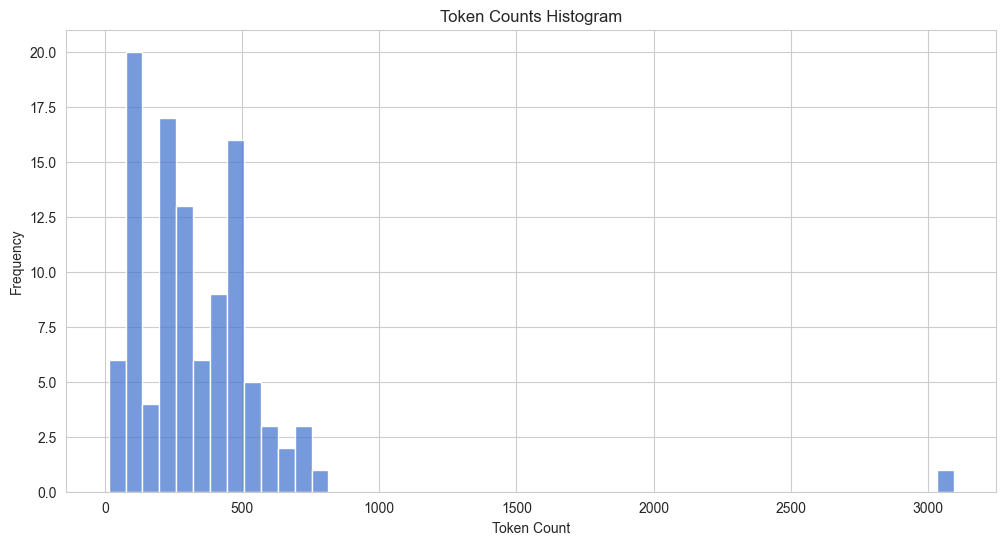

In [1061]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

### Chunking the Text

In [1062]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=50,  # number of tokens overlap between chunks
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

In [1063]:
# for document in docs:
#     # Assuming each 'document' in 'docs' has an attribute 'page_content'
#     chunks = text_splitter.split_text(document.page_content)
#     metadatas = document.metadata
#     print(type (metadatas))
#     print(len(chunks))  # If you want to print the


In [1064]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):

    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
          'id': f'{next(iter(doc.metadata.values()))}-{i}',
          'text': chunk,
        
        })

len(documents)

  0%|          | 0/106 [00:00<?, ?it/s]

152

In [1065]:
documents


[{'id': 'DIN EN 1992-1-2_page_0-0',
  'text': 'DIN EN ICS Ersatz DIN EN DIN EN Berichtigung Eurocode Bemessung Konstruktion Stahlbeton Spannbetontragwerken Teil Allgemeine Regeln Tragwerksbemessung Brandfall Deutsche Fassung EN AC Eurocode Design of concrete structures Part General rules Structural fire design German version EN AC Eurocode Calcul structures en ton Partie Regles generales Calcul du comportement au feu Version allemande EN AC Gesamtumfang Seiten Normenausschuss Bauwesen NABau im DIN ne alölgung auch auszugsweise mm'},
 {'id': 'DIN EN 1992-1-2_page_1-0',
  'text': 'Nationales Vorwort Diese Europäische Norm EN AC wurde vom Technischen Komitee CENTC „Eurocodes konstruktiven Ingenieurbau“ erarbeitet dessen Sekretariat vom BSI Vereinigtes Königreich gehalten wird Im DIN Deutsches Institut Normung ist hierfür Arbeitsausschuss NA AA „Konstruktiver baulicher Brandschutz“ Normenausschusses Bauwesen NABau zuständig Die Norm ist Bestandteil einer Reihe Einwirkungs Bemessungsnormen 

In [1066]:
text_dict = {d['id']: d['text'] for d in documents}
text_dict

{'DIN EN 1992-1-2_page_0-0': 'DIN EN ICS Ersatz DIN EN DIN EN Berichtigung Eurocode Bemessung Konstruktion Stahlbeton Spannbetontragwerken Teil Allgemeine Regeln Tragwerksbemessung Brandfall Deutsche Fassung EN AC Eurocode Design of concrete structures Part General rules Structural fire design German version EN AC Eurocode Calcul structures en ton Partie Regles generales Calcul du comportement au feu Version allemande EN AC Gesamtumfang Seiten Normenausschuss Bauwesen NABau im DIN ne alölgung auch auszugsweise mm',
 'DIN EN 1992-1-2_page_1-0': 'Nationales Vorwort Diese Europäische Norm EN AC wurde vom Technischen Komitee CENTC „Eurocodes konstruktiven Ingenieurbau“ erarbeitet dessen Sekretariat vom BSI Vereinigtes Königreich gehalten wird Im DIN Deutsches Institut Normung ist hierfür Arbeitsausschuss NA AA „Konstruktiver baulicher Brandschutz“ Normenausschusses Bauwesen NABau zuständig Die Norm ist Bestandteil einer Reihe Einwirkungs Bemessungsnormen deren Anwendung nur im Paket sinnvo

In [1067]:
text_dict

{'DIN EN 1992-1-2_page_0-0': 'DIN EN ICS Ersatz DIN EN DIN EN Berichtigung Eurocode Bemessung Konstruktion Stahlbeton Spannbetontragwerken Teil Allgemeine Regeln Tragwerksbemessung Brandfall Deutsche Fassung EN AC Eurocode Design of concrete structures Part General rules Structural fire design German version EN AC Eurocode Calcul structures en ton Partie Regles generales Calcul du comportement au feu Version allemande EN AC Gesamtumfang Seiten Normenausschuss Bauwesen NABau im DIN ne alölgung auch auszugsweise mm',
 'DIN EN 1992-1-2_page_1-0': 'Nationales Vorwort Diese Europäische Norm EN AC wurde vom Technischen Komitee CENTC „Eurocodes konstruktiven Ingenieurbau“ erarbeitet dessen Sekretariat vom BSI Vereinigtes Königreich gehalten wird Im DIN Deutsches Institut Normung ist hierfür Arbeitsausschuss NA AA „Konstruktiver baulicher Brandschutz“ Normenausschusses Bauwesen NABau zuständig Die Norm ist Bestandteil einer Reihe Einwirkungs Bemessungsnormen deren Anwendung nur im Paket sinnvo

In [1068]:
# item = documents[9]
# second_value = list(item.values())[1]
# type (second_value)

### now we get the table data 

In [1069]:
if len(df) >= 2:
    # Extract the second row
    second_row = df.iloc[1]

    # Convert the second row to a DataFrame
    
    df_second_row = pd.DataFrame([second_row])
    df_second_row.dropna()
    df_second_row = df_second_row.dropna(axis=1)

    tablesdict = df_second_row.to_dict()
    tablesdict
    tabledoc=[]
    for key in tablesdict:
        for sub_key in tablesdict[key]:
            new_entry = {
                'id': f'{key}-{sub_key}',
                'text': tablesdict[key][sub_key]
            }
            tabledoc.append(new_entry) 
    tabledoc
    # converted_dict = {d['id']: d for d in tabledoc}
    converted_dict = {d['id']: d['text'] for d in tabledoc}
    converted_dict
    text_dict.update(converted_dict)
    text_dict
else:
    print("The DataFrame does not have a TABLES  row.")

In [1070]:
# second_row = df.iloc[1]

# # Convert the second row to a DataFrame
# df_second_row = pd.DataFrame([second_row])
# df_second_row.dropna()
# df_second_row = df_second_row.dropna(axis=1)

# tablesdict = df_second_row.to_dict()
# tablesdict
# tabledoc=[]
# for key in tablesdict:
#     for sub_key in tablesdict[key]:
#         new_entry = {
#             'id': f'{key}-{sub_key}',
#             'text': tablesdict[key][sub_key]
#         }
#         tabledoc.append(new_entry) 
# tabledoc
# # converted_dict = {d['id']: d for d in tabledoc}
# converted_dict = {d['id']: d['text'] for d in tabledoc}
# converted_dict
# text_dict.update(converted_dict)
# text_dict


In [1071]:
# df_second_row.dropna()
# df_second_row = df_second_row.dropna(axis=1)

# tablesdict = df_second_row.to_dict()
# tablesdict
# tabledoc=[]
# for key in tablesdict:
#     for sub_key in tablesdict[key]:
#         new_entry = {
#             'id': f'{key}-{sub_key}',
#             'text': tablesdict[key][sub_key]
#         }
#         tabledoc.append(new_entry) 
# tabledoc
# # converted_dict = {d['id']: d for d in tabledoc}
# converted_dict = {d['id']: d['text'] for d in tabledoc}
# converted_dict
# text_dict.update(converted_dict)
# text_dict

In [1072]:
# for key in tables:
#     for sub_key in tables[key]:
#         new_entry = {
#             'id': f'{key}-{sub_key}',
#             'text': tables[key][sub_key]
#         }
#         documents.append(new_entry)

In [1073]:
# import json

# with open(f'{filename}.jsonl', 'w') as f:
#     for doc in text_dict:
#         f.write(json.dumps(doc) + '\n')

In [1074]:

import json
import os
output_folder = r"C:\A\00Master\Demo\data acc\att\output"

# Full path for the file
filename = os.path.join(output_folder, filename)


# Write to the JSONL file in the specified folder
with open(filename, 'w') as file:
    for key in sorted(text_dict.keys()):
        # Create a JSON object for each sorted key-value pair
        json_object = json.dumps({key: text_dict[key]})
        # Write each JSON object as a new line in the file
        file.write(json_object + '\n')


In [1075]:
# import json
# with open(filename, 'w') as file:
#     for key in sorted(text_dict.keys()):
#         # Create a JSON object for each sorted key-value pair
#         json_object = json.dumps({key: text_dict[key]})
#         # Write each JSON object as a new line in the file
#         file.write(json_object + '\n')

### Remove unnecessary Sentences

In [ ]:

import pandas as pd
import re

# Assuming df is your DataFrame

# Define the sentences to remove in a list
sentences_to_remove = [
    "Technische Universität Darmstadt",
    "Universität Darmstadt",
    "Berlin, gestattet",
    "Alleinverkauf der Normen durch Beuth Verlag GmbH, 10772 Berlin www.beuth.de",
    "Printed copies are uncontrolled,",
    "— Leerseite —",
    "e. V.",
    "www.beuth.de",
    "Jede Art der Vervielfältigung",
    "nur mit Genehmigung des DIN Deutsches Institut für Normung",
    "nur mit Genehmigung des DIN Deutsches Institut für Normung e. V.",
    "DIN Deutsches Institut für Normung e. V. : Jede Art der Vervielfältigung, auch auszugsweise, 3 , Berlin, gestattet.",
    "www.din.de"
    
]
# "DIN Deutsches Institut für Normung e. V.",
# Compile regex patterns for each sentence to allow variations in formatting
regex_patterns = [re.compile(re.escape(sentence), re.IGNORECASE) for sentence in sentences_to_remove]

# Define a function to remove sentences using regex patterns
def remove_sentences(text):
    if isinstance(text, str) and pd.notna(text):
        for pattern in regex_patterns:
            text = pattern.sub('', text)
    return text

# Apply the function to the entire DataFrame
df = df.map(remove_sentences)

# Display the modified DataFrame
df.iloc[0,0]